# Statisitcal Analysis 

Any kind of statistical analysis starts with a purpose and hypothesis. To get to the result if the hypothese is True or not we follow certain list of steps which will refine the process and give a strucutred insight which will be properly aligned. 

## Step 1) Exploratory Data Analysis

Lets start analysing the daily returns of AAPL since that's my one of the fav stock

In [327]:
# Importing the packages which will be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [328]:
# Clean the data set to our requirements

main_data=pd.read_csv("data/AAPL.csv")
main_data=main_data[['Date','Close','Volume']]
main_data['Date']=pd.to_datetime(main_data['Date'])
main_data.index=main_data['Date']
main_data=main_data.drop({'Date'},axis=1)
main_data['Returns']=main_data['Close'].pct_change(1)*100
main_data['Volume Change']=main_data['Volume'].pct_change(1)*100
main_data=main_data.dropna()
main_data['years']=main_data.index.year
main_data['months']=main_data.index.month
print(main_data.head(5))

                Close    Volume   Returns  Volume Change  years  months
Date                                                                   
2012-01-04  59.062859  65005500  0.537415     -13.962904   2012       1
2012-01-05  59.718571  67817400  1.110193       4.325634   2012       1
2012-01-06  60.342857  79573200  1.045380      17.334489   2012       1
2012-01-09  60.247143  98506100 -0.158617      23.793061   2012       1
2012-01-10  60.462856  64549100  0.358047     -34.471977   2012       1


### Histogram plot of returns using Seaborn

Number of bins=33


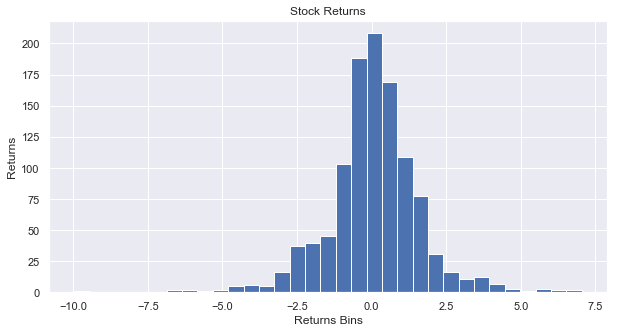

Number of bins=50


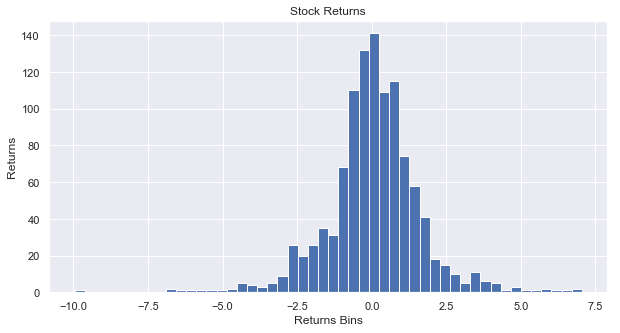

Conclusion
The Returns are normally distributed


In [329]:
data=main_data[main_data.index.year>=2015]
n_bins=int(np.sqrt(data.shape[0]))

# Statement to increase size of plots in Jupyter Notebook
plt.rcParams['figure.figsize'] = [10, 5]


print("Number of bins="+str(n_bins))
sns.set()
_ = plt.hist(data['Returns'],bins=n_bins)
_ = plt.xlabel("Returns Bins")
_ = plt.ylabel("Returns")
_ = plt.title("Stock Returns")
plt.show()


n_bins=50
print("Number of bins="+str(n_bins))
sns.set()
_ = plt.hist(data['Returns'],bins=n_bins)
_ = plt.xlabel("Returns Bins")
_ = plt.ylabel("Returns")
_ = plt.title("Stock Returns")
plt.show()

print("Conclusion")
print("The Returns are normally distributed")

### Bee Swarm Plots

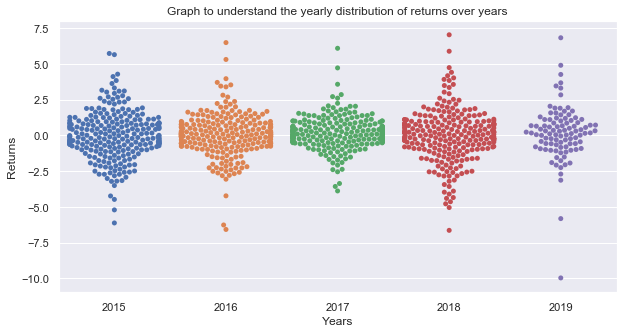

Conclusion
I am somewhat inclined to say that we say more drawdowns/rallies in year 2018 as compared to '16 & '15


In [330]:

_ = sns.swarmplot(x='years',y='Returns',data=data)

# Label the axes

_ = plt.xlabel("Years")
_ = plt.ylabel("Returns")
_ = plt.title("Graph to understand the yearly distribution of returns over years")

# Show the plot
plt.show()
print("Conclusion")
print("I am somewhat inclined to say that we say more drawdowns/rallies in year 2018 as compared to '16 & '15")

### Exponential Cumulative Distribution Function (ECDF)

ECDF is very effective to see how data is distributed

In [331]:
def ecdf(data):
    """Computer ECDF"""
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,(n+1)) / n
    return x,y

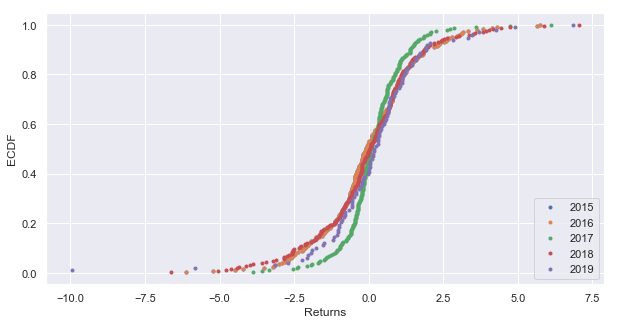

There is not much difference among CDF distribution for all years but we can certainly see 2018 was more volatile than rest, bcause thats when AAPL start it's rally from double digit price after Berkshire invested in AAPL


In [332]:
x_2015,y_2015 = ecdf(np.array(data[data['years']==2015]['Returns']))
x_2016,y_2016 = ecdf(np.array(data[data['years']==2015]['Returns']))
x_2017,y_2017 = ecdf(np.array(data[data['years']==2017]['Returns']))
x_2018,y_2018 = ecdf(np.array(data[data['years']==2018]['Returns']))
x_2019,y_2019 = ecdf(np.array(data[data['years']==2019]['Returns']))

_=plt.plot(x_2015,y_2015,marker='.',linestyle='none')
_=plt.plot(x_2016,y_2016,marker='.',linestyle='none')
_=plt.plot(x_2017,y_2017,marker='.',linestyle='none')
_=plt.plot(x_2018,y_2018,marker='.',linestyle='none')
_=plt.plot(x_2019,y_2019,marker='.',linestyle='none')


plt.legend(('2015', '2016', '2017','2018','2019'), loc='lower right')
_=plt.xlabel('Returns')
_=plt.ylabel('ECDF')
plt.show()

print("There is not much difference among CDF distribution for all years but we can certainly see 2018 was more volatile than rest, bcause thats when AAPL start it's rally from double digit price after Berkshire invested in AAPL")

### Analysis by grouping months

Our above analysis was for years, lets do analysis for year between 2015<= to <=2018 and undestand monthly dynamics for AAPL stock, may be we can find something interesting 

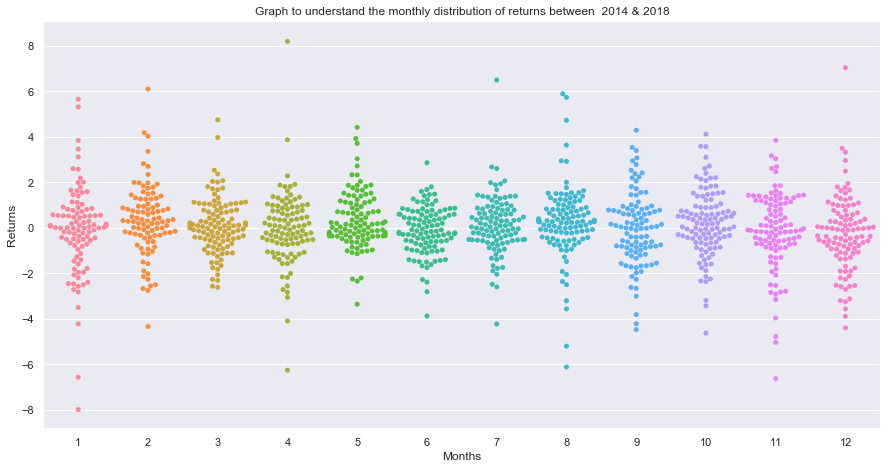

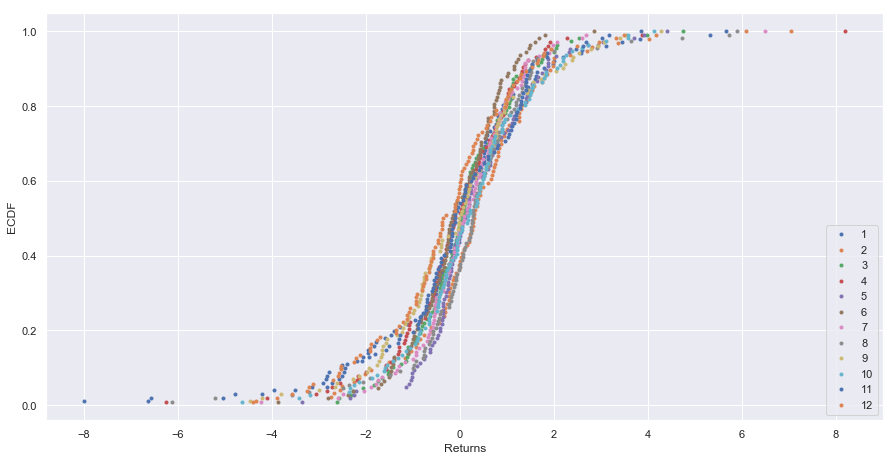

Conclusion
I definitely need to do Metric analysis, plots/graphs may or may not tell a story, sometimes they do, not always.


In [333]:
data=main_data[(main_data.index.year>=2014) & (main_data.index.year<=2018)]

# Increasing size of graphs
plt.rcParams['figure.figsize'] = [15, 7.5]

_ = sns.swarmplot(x='months',y='Returns',data=data)

# Label the axes
_ = plt.xlabel("Months")
_ = plt.ylabel("Returns")
_ = plt.title("Graph to understand the monthly distribution of returns between  2014 & 2018")

# Show the plot
plt.show()

x_1,y_1 = ecdf(np.array(data[data['months']==1]['Returns']))
x_2,y_2 = ecdf(np.array(data[data['months']==2]['Returns']))
x_3,y_3 = ecdf(np.array(data[data['months']==3]['Returns']))
x_4,y_4 = ecdf(np.array(data[data['months']==4]['Returns']))
x_5,y_5 = ecdf(np.array(data[data['months']==5]['Returns']))
x_6,y_6 = ecdf(np.array(data[data['months']==6]['Returns']))
x_7,y_7 = ecdf(np.array(data[data['months']==7]['Returns']))
x_8,y_8 = ecdf(np.array(data[data['months']==8]['Returns']))
x_9,y_9 = ecdf(np.array(data[data['months']==9]['Returns']))
x_10,y_10 = ecdf(np.array(data[data['months']==10]['Returns']))
x_11,y_11 = ecdf(np.array(data[data['months']==11]['Returns']))
x_12,y_12 = ecdf(np.array(data[data['months']==12]['Returns']))

_=plt.plot(x_1,y_1,marker='.',linestyle='none')
_=plt.plot(x_2,y_2,marker='.',linestyle='none')
_=plt.plot(x_3,y_3,marker='.',linestyle='none')
_=plt.plot(x_4,y_4,marker='.',linestyle='none')
_=plt.plot(x_5,y_5,marker='.',linestyle='none')
_=plt.plot(x_6,y_6,marker='.',linestyle='none')
_=plt.plot(x_7,y_7,marker='.',linestyle='none')
_=plt.plot(x_8,y_8,marker='.',linestyle='none')
_=plt.plot(x_9,y_9,marker='.',linestyle='none')
_=plt.plot(x_10,y_10,marker='.',linestyle='none')
_=plt.plot(x_11,y_11,marker='.',linestyle='none')
_=plt.plot(x_12,y_12,marker='.',linestyle='none')


plt.legend(('1', '2', '3','4','5','6','7','8','9','10','11','12'), loc='lower right')
_=plt.xlabel('Returns')
_=plt.ylabel('ECDF')
plt.show()

print("Conclusion")
print("I definitely need to do Metric analysis, plots/graphs may or may not tell a story, sometimes they do, not always.")


## Step 2) Quantitative Exploratory Data Analysis [2014 - 2018]

### Mean, Median and Box Plots
Lets do an analysis of past 4 years of data from 2014 to 2018, and see how AAPL stocks behave in all months, in a more metrics format

In [334]:
# A simple mean
print(data.groupby('months')['Returns'].mean())
print("Mean is not always a good measure to anayse anyhing, a bunch of extreme(outliers) can really deviate the insights")

months
1    -0.076961
2     0.343942
3     0.094779
4    -0.050900
5     0.345806
6    -0.108132
7     0.142170
8     0.275808
9    -0.032478
10    0.204530
11   -0.110275
12   -0.259217
Name: Returns, dtype: float64
Mean is not always a good measure to anayse anyhing, a bunch of extreme(outliers) can really deviate the insights


Using percentiles at 2.5, 25, 50, 75, 97.5 to analyze results at different level

Percetile Results
1 month =[-3.86089118 -0.71516005  0.04923285  0.76343082  3.64818313]
2 month =[-2.62824898 -0.32381324  0.30471463  1.10340171  3.77661181]
3 month =[-2.28052563 -0.55285232  0.04944126  0.7808764   2.41643303]
4 month =[-2.93418699 -0.6938663  -0.09736352  0.79034593  2.07978121]
5 month =[-2.22192856 -0.35935627  0.13405096  1.09775651  3.28967783]
6 month =[-2.31274986 -0.66732662 -0.15545713  0.59371211  1.62740199]
7 month =[-2.21671019 -0.5273282   0.09011314  0.80469553  2.28097882]
8 month =[-3.29725444 -0.31810321  0.270089    0.90558735  3.90807544]
9 month =[-3.38947768 -0.9539783   0.01084175  0.80358696  3.22759048]
10 month =[-2.57232001 -0.4724856   0.17310168  0.92159417  3.21765915]
11 month =[-4.35013602 -0.72720007 -0.09925219  1.13718235  2.85222455]
12 month =[-3.38164753 -1.06957348 -0.32447017  0.59207252  3.11574649]


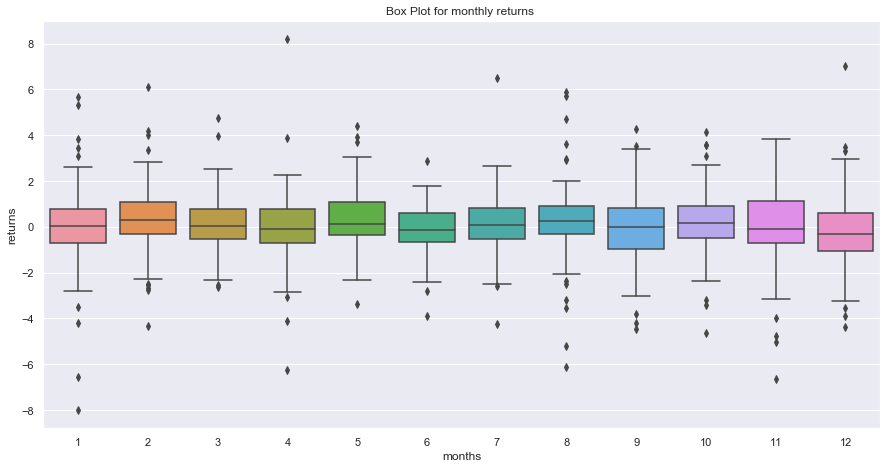

In [335]:
# Percentiles
percentiles=np.array([2.5,25,50,75,97.5])
print("Percetile Results")
# Compute percentiles: ptiles_vers
for i in range(1,13):
    ptiles_vers=np.percentile(data[data['months']==i]['Returns'],percentiles)
    # Print the result
    print(str(i) +" month =" + str(ptiles_vers))

_=sns.boxplot(x='months',y='Returns',data=data)
_=plt.xlabel('months')
_=plt.ylabel('returns')
_=plt.title("Box Plot for monthly returns ")
plt.show()

### Variance & Standard Deviation

Lets do some meaningful analysis, since we are concentrating on months I want to see the following. Does the stock repeat a certain pattern every year? eg does AAPL always goes down in month of June or Dec. 

In [336]:
GB=data.groupby([(data.index.month)])

In [337]:
GB.groups.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

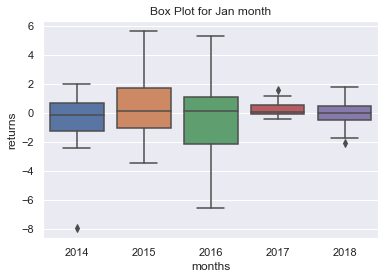

The variances for month Jan
years
2014    0.024581
2015    0.030738
2016    0.040557
2017    0.001476
2018    0.005518
Name: Normal Returns, dtype: float64


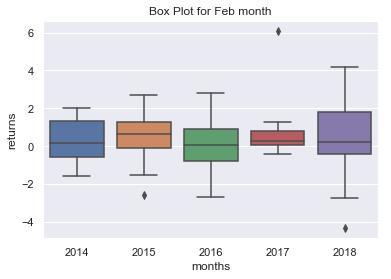

The variances for month Feb
years
2014    0.011264
2015    0.015020
2016    0.019711
2017    0.017847
2018    0.047502
Name: Normal Returns, dtype: float64


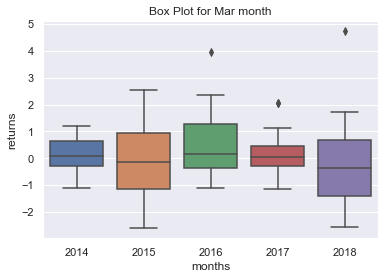

The variances for month Mar
years
2014    0.008667
2015    0.035131
2016    0.027302
2017    0.011733
2018    0.051344
Name: Normal Returns, dtype: float64


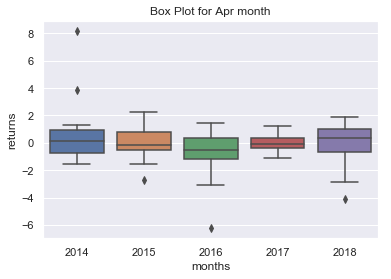

The variances for month Apr
years
2014    0.022211
2015    0.007355
2016    0.015232
2017    0.001673
2018    0.012447
Name: Normal Returns, dtype: float64


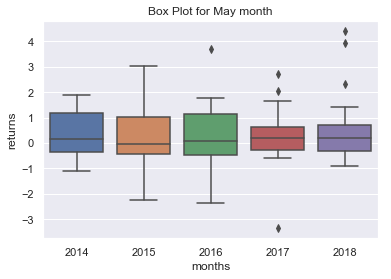

The variances for month May
years
2014    0.013224
2015    0.032026
2016    0.028571
2017    0.024167
2018    0.032061
Name: Normal Returns, dtype: float64


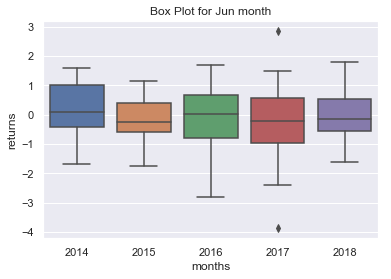

The variances for month Jun
years
2014    0.017788
2015    0.011208
2016    0.029238
2017    0.045165
2018    0.016705
Name: Normal Returns, dtype: float64


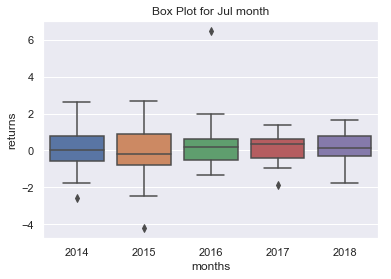

The variances for month Jul
years
2014    0.012897
2015    0.021242
2016    0.023332
2017    0.005447
2018    0.008107
Name: Normal Returns, dtype: float64


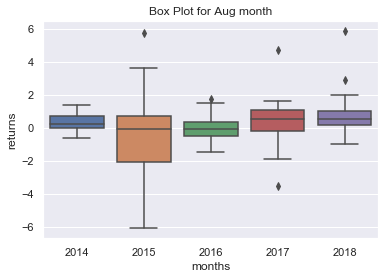

The variances for month Aug
years
2014    0.002991
2015    0.052276
2016    0.004562
2017    0.015923
2018    0.014112
Name: Normal Returns, dtype: float64


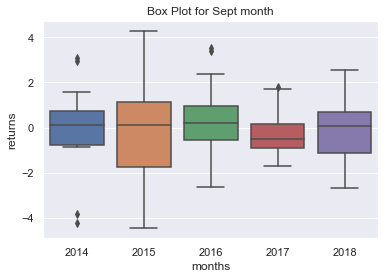

The variances for month Sept
years
2014    0.038432
2015    0.056881
2016    0.036024
2017    0.013982
2018    0.026859
Name: Normal Returns, dtype: float64


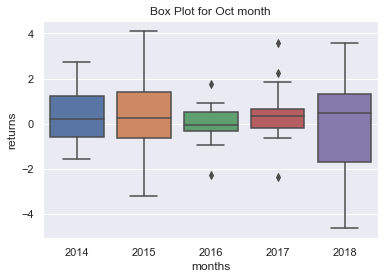

The variances for month Oct
years
2014    0.019377
2015    0.034538
2016    0.008506
2017    0.018119
2018    0.055440
Name: Normal Returns, dtype: float64


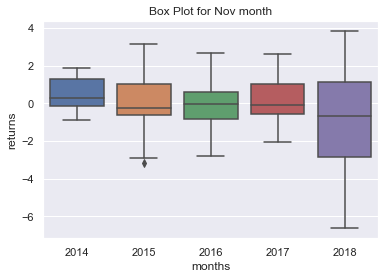

The variances for month Nov
years
2014    0.006765
2015    0.019827
2016    0.016260
2017    0.012971
2018    0.070664
Name: Normal Returns, dtype: float64


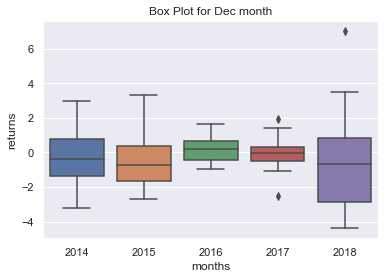

The variances for month Dec
years
2014    0.019260
2015    0.017773
2016    0.004256
2017    0.006852
2018    0.060291
Name: Normal Returns, dtype: float64


In [338]:
from sklearn import preprocessing
# Closing the warning signs
pd.options.mode.chained_assignment = None  # default='warn'

min_max_scaler = preprocessing.MinMaxScaler()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
plt.rcParams['figure.figsize'] = [7.5, 3.5]
%matplotlib inline
for i in GB.groups.keys():
    temp=GB.get_group(i)
    temp['Normal Returns']=min_max_scaler.fit_transform(temp[['Returns']])
    _=sns.boxplot(x='years',y='Returns',data=temp)
    _=plt.xlabel('months')
    _=plt.ylabel('returns')
    _=plt.title("Box Plot for "+months[i-1]+" month")
    plt.show()
    print("The variances for month "+ months[i-1])
    print(temp.groupby('years')['Normal Returns'].var())

## Step 3) Probabilistically-- Discrete variables
### Random Numbers

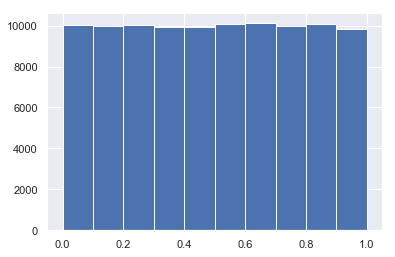

A histogram with equal heights shows that numbers generated are random numbers


In [339]:
np.random.seed(42)
random_numbers=np.empty(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()
_ = plt.hist(random_numbers)

# Show the plot
plt.show()
print("A histogram with equal heights shows that numbers generated are random numbers")

### Bernoulli trials

In [340]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number=np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number<p:
            n_success+=1

    return n_success

print(perform_bernoulli_trials(100000,0.5)/100000)
print("This proves that the numbers generated are random number")

0.49834
This proves that the numbers generated are random number


### Bank Defaults

Lets say a bank gives out 100 Loans. Probability of a loan default is 0.05. The number of loans that can default at any instance ranges from 0 to 100. Draw a histogram for number of bank defaults

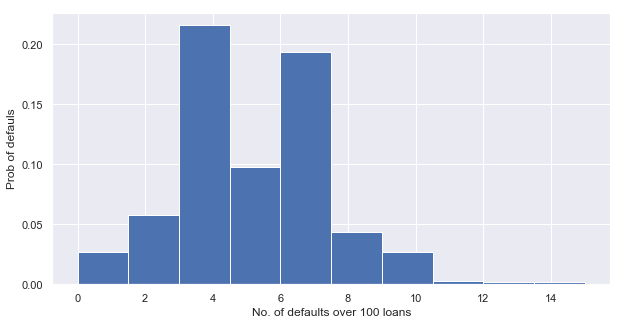

In [341]:
np.random.seed(42)
n_defaults=np.empty(1000)
plt.rcParams['figure.figsize'] = [10, 5]
for i in range(1000):
    n_defaults[i]=perform_bernoulli_trials(100, 0.05)

_=plt.hist(n_defaults,density=True)    
_=plt.xlabel("No. of defaults over 100 loans")
_=plt.ylabel("Prob of defauls")
plt.show()

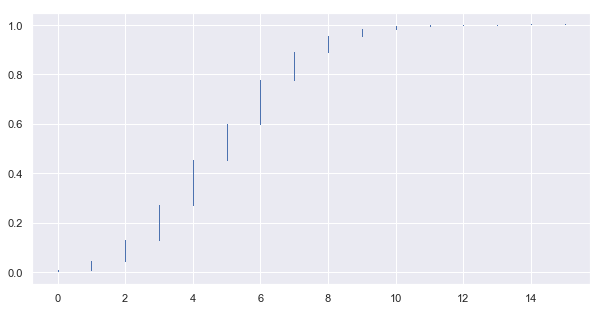

Probability of losing money = 0.022


In [342]:
# Draw an ECDF
x,y=ecdf(n_defaults)
_=plt.plot(x,y,marker=',',linestyle='none')
plt.show()

# Number of defaults greater than 10 in a particular instance
n_lose_money=np.sum(n_defaults>=10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

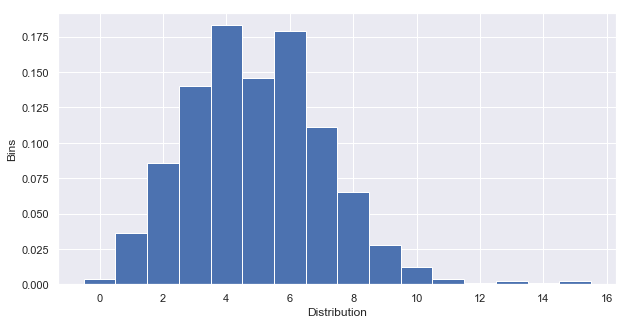

In [343]:
bins = np.arange(0,max(n_defaults) + 1.5) -0.5
# Generate histogram
_=plt.hist(n_defaults,density=True,bins=bins)

# Label axes
_=plt.xlabel("Distribution")
_=plt.ylabel("Bins")
plt.show()
# Show the plot



### Poisson Distribution

In [344]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson=np.random.poisson(10,size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n=[20,100,1000]
p=[0.5,0.1,0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(0,3):
    samples_binomial = np.random.binomial(n[i],p[i],size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))
print("The means are all about the same, which can be shown to be true by doing some pen-and-paper work. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.")

Poisson:      9.9881 3.1578407797100856
n = 20 Binom: 10.0222 2.2492014494037655
n = 100 Binom: 10.0776 3.0122712759643675
n = 1000 Binom: 10.0481 3.1480130860592053
The means are all about the same, which can be shown to be true by doing some pen-and-paper work. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.


## Step 4) Continious Variables

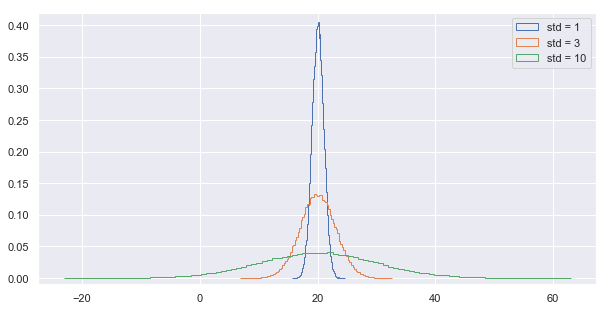

In [345]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1=np.random.normal(20,1,size=100000)
samples_std3=np.random.normal(20,3,size=100000)
samples_std10=np.random.normal(20,10,size=100000)

# Make histograms
_=plt.hist(samples_std1,density=True,histtype='step',bins=100)
_=plt.hist(samples_std3,density=True,histtype='step',bins=100)
_=plt.hist(samples_std10,density=True,histtype='step',bins=100)

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


### CDF Of above graphs

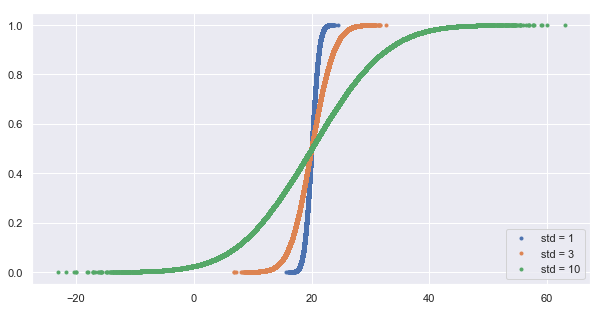

In [346]:
# Generate CDFs
x_std1, y_std1=ecdf(samples_std1)
x_std3, y_std3=ecdf(samples_std3)
x_std10, y_std10=ecdf(samples_std10)

# Make histograms
_=plt.plot(x_std1,y_std1,marker='.',linestyle='none')
_=plt.plot(x_std3,y_std3,marker='.',linestyle='none')
_=plt.plot(x_std10,y_std10,marker='.',linestyle='none')



# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


### Are the Belmont Stakes results Normally distributed?

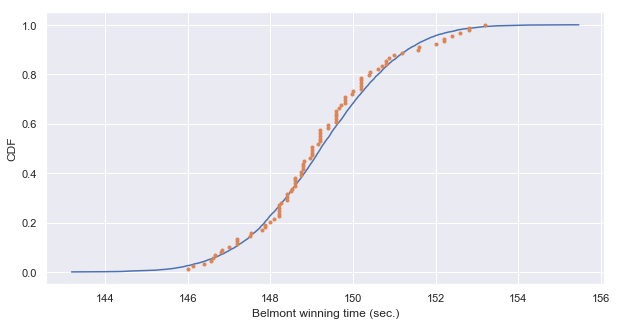

Thus it shows that data is normally distributed


In [347]:
belmont_no_outliers = np.array([148.51,  146.65,  148.52,  150.7,  150.42,  150.88,  151.57,
                                147.54,  149.65,  148.74,  147.86,  148.75,  147.5,  148.26,
                                149.71,  146.56,  151.19,  147.88,  149.16,  148.82,  148.96,
                                152.02,  146.82,  149.97,  146.13,  148.1,  147.2,  146.,
                                146.4,  148.2,  149.8,  147.,  147.2,  147.8,  148.2,
                                149.,  149.8,  148.6,  146.8,  149.6,  149.,  148.2,
                                149.2,  148.,  150.4,  148.8,  147.2,  148.8,  149.6,
                                148.4,  148.4,  150.2,  148.8,  149.2,  149.2,  148.4,
                                150.2,  146.6,  149.8,  149.,  150.8,  148.6,  150.2,
                                149.,  148.6,  150.2,  148.2,  149.4,  150.8,  150.2,
                                152.2,  148.2,  149.2,  151.,  149.6,  149.6,  149.4,
                                148.6,  150.,  150.6,  149.2,  152.6,  152.8,  149.6,
                                151.6,  152.8,  153.2,  152.4,  152.2])


# Compute mean and standard deviation: mu, sigma
mu=np.mean(belmont_no_outliers)
sigma=np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples=np.random.normal(mu,sigma,size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor=ecdf(samples) 
x, y=ecdf(belmont_no_outliers) 

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

print("Thus it shows that data is normally distributed")

### Exponential Distribution ( Stimulating a story to understand probabillity of events happening)

How long must we wait to 2 Poisson processes occur together can be modelled by stimulation. The solution is total waiting time is the time waited for the 1 st poisson process, plus the time waited for the second poission process


In [348]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1,size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2,size)

    return t1 + t2

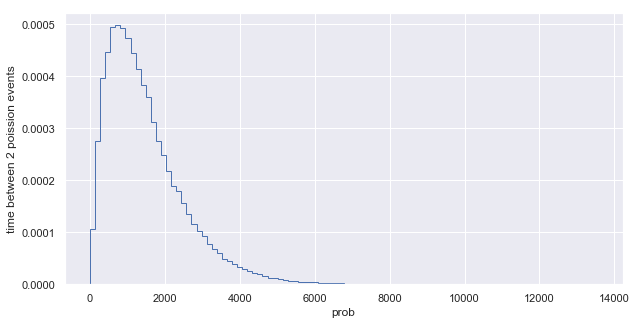

In [349]:
# Draw samples of waiting times: waiting_times where 764 and 715 are two waiting time periods
waiting_times=successive_poisson(764,715,size=100000)

# Make the histogram
plt.hist(waiting_times,bins=100,density=True,histtype='step')

# Label axes
_=plt.xlabel("prob")
_=plt.ylabel("time between 2 poission events")

# Show the plot
plt.show()


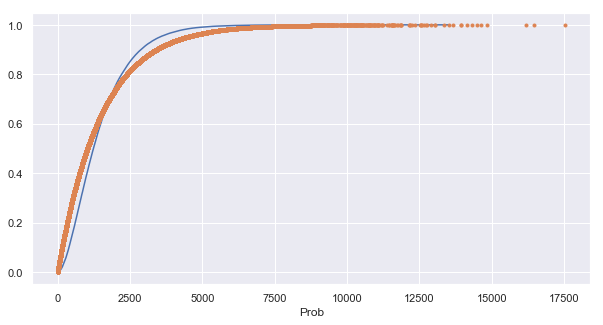

In [350]:
# CDF for above graph
mu=np.mean(waiting_times)

samples=np.random.exponential(mu,size=100000)

x,y=ecdf(waiting_times)
x_sample,y_sample=ecdf(samples)

_=plt.plot(x,y)
_=plt.plot(x_sample,y_sample,marker='.',linestyle='none')
_=plt.xlabel("Games between no-hitters")
_=plt.xlabel("Prob")
plt.show()

What is we double our mean = 2* mu or reduce our mean = mu/2. How will our exponential graph fit

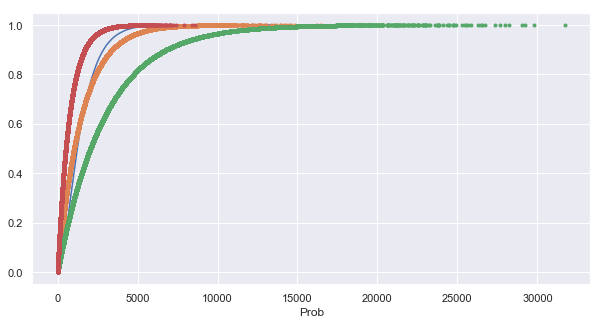

If we sample out exponeneital distribution with 2*mu or mu/2 we see that the generated data doesn't fit the data that well


In [351]:
mu=np.mean(waiting_times)

samples3=np.random.exponential(2*mu,size=100000)
samples4=np.random.exponential(mu/2,size=100000)

x_sample3,y_sample3=ecdf(samples3)
x_sample4,y_sample4=ecdf(samples4)

_=plt.plot(x,y)
_=plt.plot(x_sample,y_sample,marker='.',linestyle='none')
_=plt.plot(x_sample3,y_sample3,marker='.',linestyle='none')
_=plt.plot(x_sample4,y_sample4,marker='.',linestyle='none')
_=plt.xlabel("Games between no-hitters")
_=plt.xlabel("Prob")
plt.show()

print("If we sample out exponeneital distribution with 2*mu or mu/2 we see that the generated data doesn't fit the data that well")